In [2]:
print("Playground notebook")

Playground notebook


In [3]:
%notebook inline

In [4]:
from pymatgen.electronic_structure.boltztrap2 import *
from monty.serialization import loadfn
from pymatgen.electronic_structure.plotter import BSPlotter
from pymatgen.electronic_structure.plotter import DosPlotter

In [5]:
vrun = Vasprun('vasprun.xml',parse_projected_eigen=True)
data = VasprunBSLoader(vrun)

/Users/max/opt/anaconda3/envs/boltztrap2/lib/python3.9/site-packages/pymatgen/io/vasp/inputs.py:1732: UserWarning: Ignoring unknown variable type SHA256
  warnings.warn(f"Ignoring unknown variable type {key}")
/Users/max/opt/anaconda3/envs/boltztrap2/lib/python3.9/site-packages/pymatgen/io/vasp/inputs.py:1732: UserWarning: Ignoring unknown variable type COPYR
  warnings.warn(f"Ignoring unknown variable type {key}")


In [37]:
# set curvature=False to speed up in case you do not need effective mass or hall coeficients
bztInterp = BztInterpolator(data,lpfac=10,energy_range=15,curvature=True,
                            save_bztInterp=True,fname='bztInterp.json.gz')
# bztInterp = BztInterpolator(data,load_bztInterp=True,fname='bztInterp.json.gz')

# Compute and plot the band structure on standard symmetry path

In [38]:
sbs = bztInterp.get_band_structure()
list(sbs.bands.values())[0].shape

(20, 188)

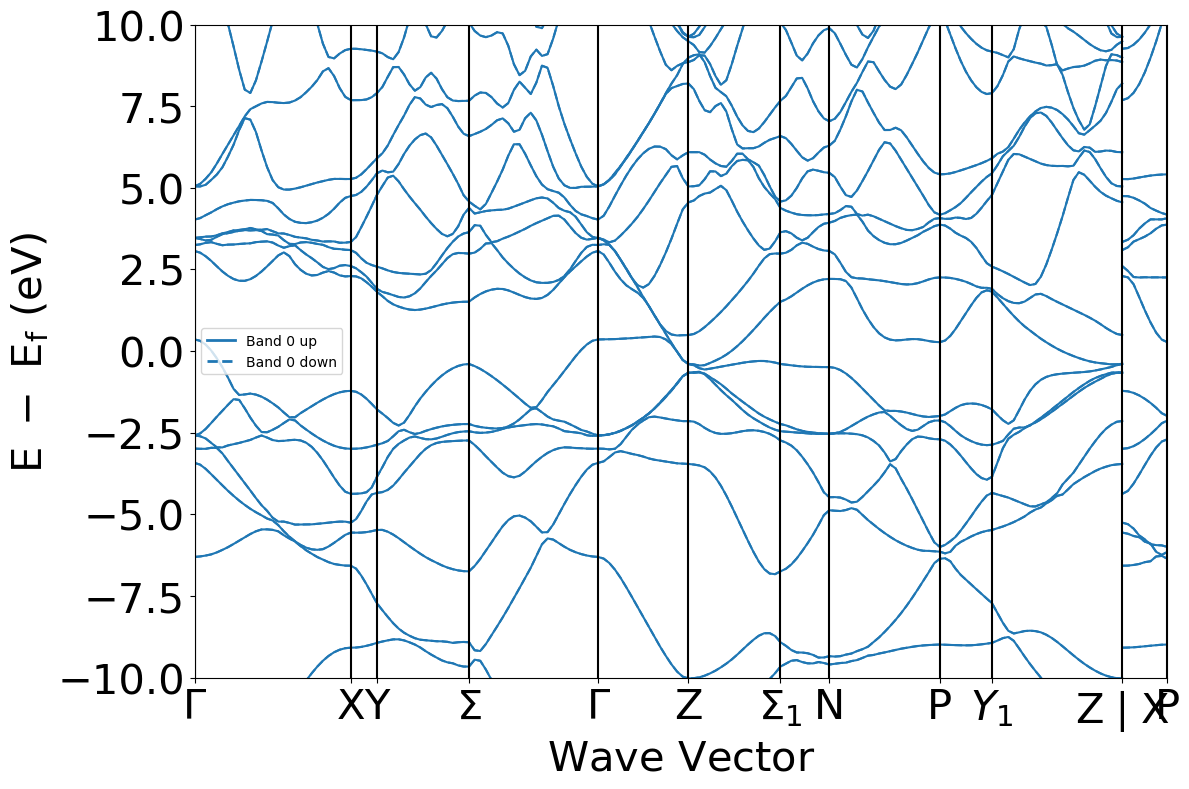

In [39]:
BSPlotter(sbs).show()

# On a specific kpoint path

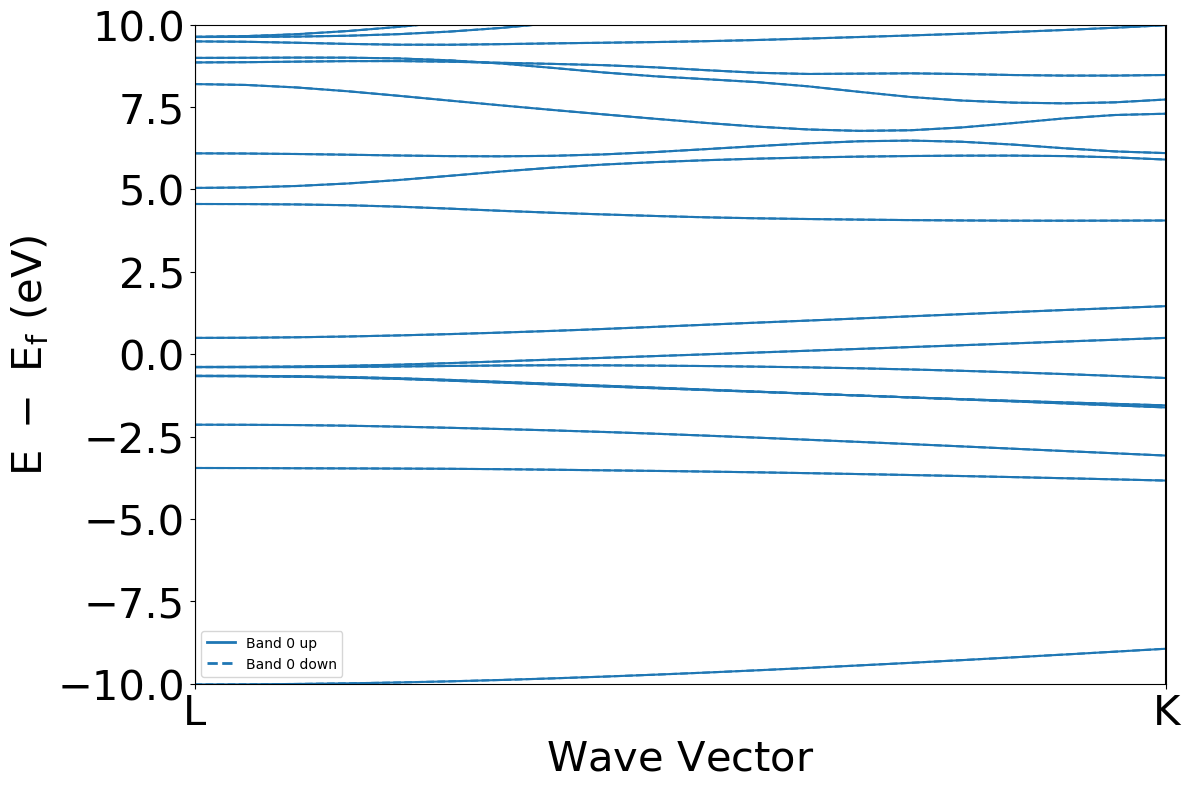

In [40]:
# define the path as a list
kpaths = [['L','K']]
# set the fractional coordinates of the kpoint as a dict
kp_lbl = {'L':np.array([0.5,0.5,0.5]),'K': np.array([0.375, 0.375, 0.75 ])}
sbs = bztInterp.get_band_structure(kpaths,kp_lbl)
BSPlotter(sbs).show()

# Compute and plot Dos

In [41]:
tot_dos = bztInterp.get_dos()
len(tot_dos.energies)

10000

In [42]:
# set progress=True to show a progress bar
tot_proj_dos = bztInterp.get_dos(partial_dos=True,progress=True)

60it [15:58, 15.97s/it]                                                         


In [43]:
len(tot_proj_dos.get_spd_dos().values())

3

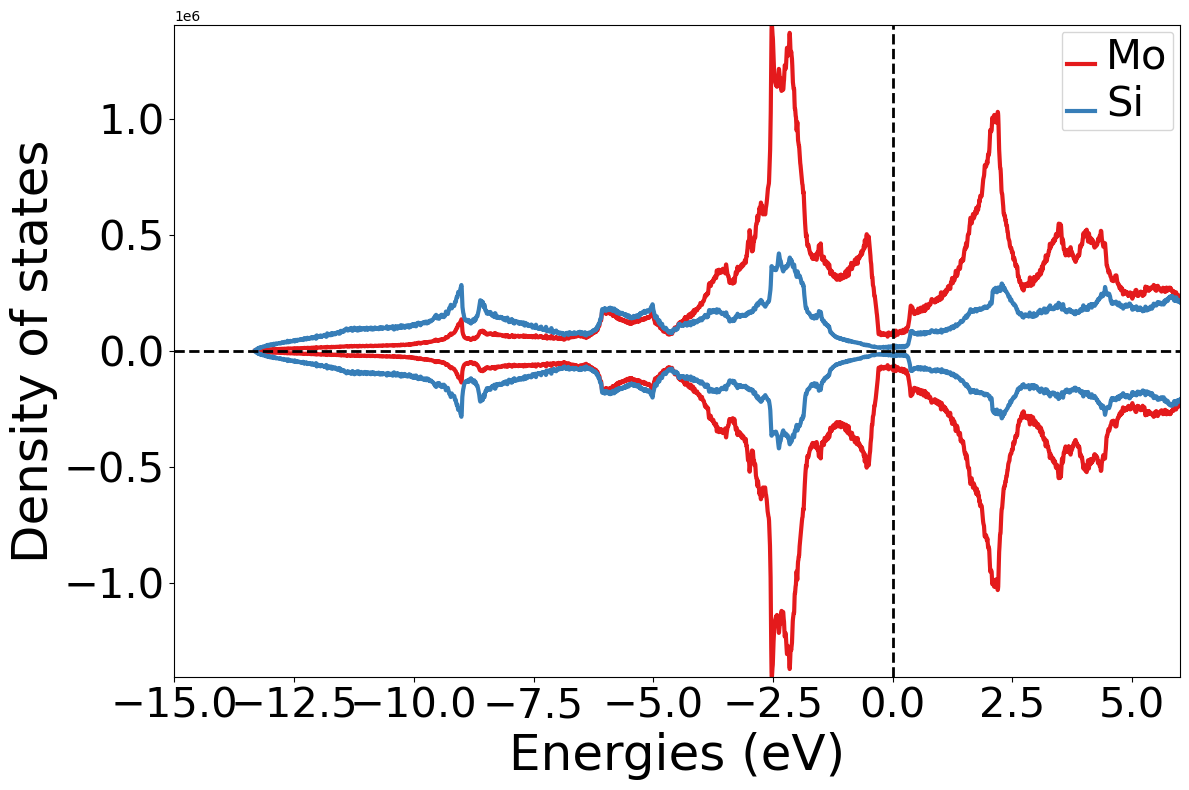

In [44]:
pltdos = DosPlotter(sigma=0.005)
pltdos.add_dos_dict(tot_proj_dos.get_element_dos())
pltdos.show(xlim=[-15,6])

# Save and Load coefficients

In [45]:
# set fname argument to specify a different file name
# bztInterp = BztInterpolator(data,lpfac=10,energy_range=1.5,curvature=True,
                            # save_bztInterp=True,fname='bztInterp.json.gz')
# len(bztInterp.coeffs)

In [46]:
# bztInterp = BztInterpolator(data,load_bztInterp=True,fname='bztInterp.json.gz')
# len(bztInterp.coeffs)

# Transport Properties

In [47]:
bztTransp = BztTransportProperties(bztInterp,temp_r = np.arange(300,1300,300))

In [48]:
print('\t'.join(['Temp', '\mu', 'rows', 'columns tensor']))
for p in bztTransp.Conductivity_mu, bztTransp.Seebeck_mu, bztTransp.Kappa_mu, \
         bztTransp.Effective_mass_mu, bztTransp.Power_Factor_mu, bztTransp.Carrier_conc_mu:
    print('\t'.join([str(i) for i in p.shape]))

Temp	\mu	rows	columns tensor
4	3770	3	3
4	3770	3	3
4	3770	3	3
4	3770	3	3
4	3770	3	3
4	3770


In [49]:
bztTransp.compute_properties_doping(doping=10.**np.arange(16,23))

In [50]:
print('\t'.join(['Temp', 'Doping', 'rows', 'columns tensor']))
for p in bztTransp.Conductivity_doping, bztTransp.Seebeck_doping, bztTransp.Kappa_doping, \
         bztTransp.Carriers_conc_doping,bztTransp.Effective_mass_doping, bztTransp.Power_Factor_doping:
    print('\t'.join([str(i) for i in p['n'].shape]))

Temp	Doping	rows	columns tensor
4	7	3	3
4	7	3	3
4	7	3	3
4	7
4	7	3	3
4	7	3	3


In [51]:
# bztTransp = BztTransportProperties(bztInterp,temp_r = np.arange(300,1300,300), doping=10.**np.arange(16,23))

In [52]:
# set fname argument to specify a different file name
# bztTransp = BztTransportProperties(bztInterp,temp_r = np.arange(300,1300,300), doping=10.**np.arange(16,23),
#                                    save_bztTranspProps=True,fname='bztTranspProps.json.gz')

In [53]:
# bztTransp = BztTransportProperties(bztInterp,load_bztTranspProps=True,fname='bztTranspProps.json.gz')

# Plotter

In [54]:
bztPlotter = BztPlotter(bztTransp,bztInterp)

<module 'matplotlib.pyplot' from '/Users/max/opt/anaconda3/envs/boltztrap2/lib/python3.9/site-packages/matplotlib/pyplot.py'>

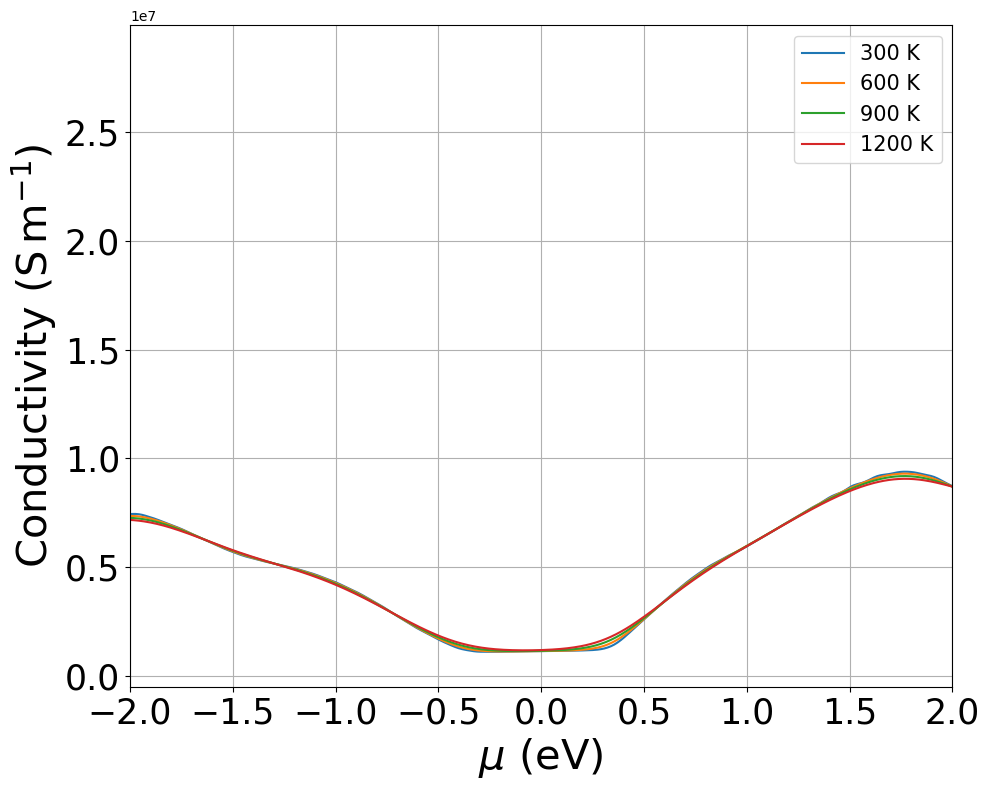

In [55]:
bztPlotter.plot_props('C','mu','temp')

<module 'matplotlib.pyplot' from '/Users/max/opt/anaconda3/envs/boltztrap2/lib/python3.9/site-packages/matplotlib/pyplot.py'>

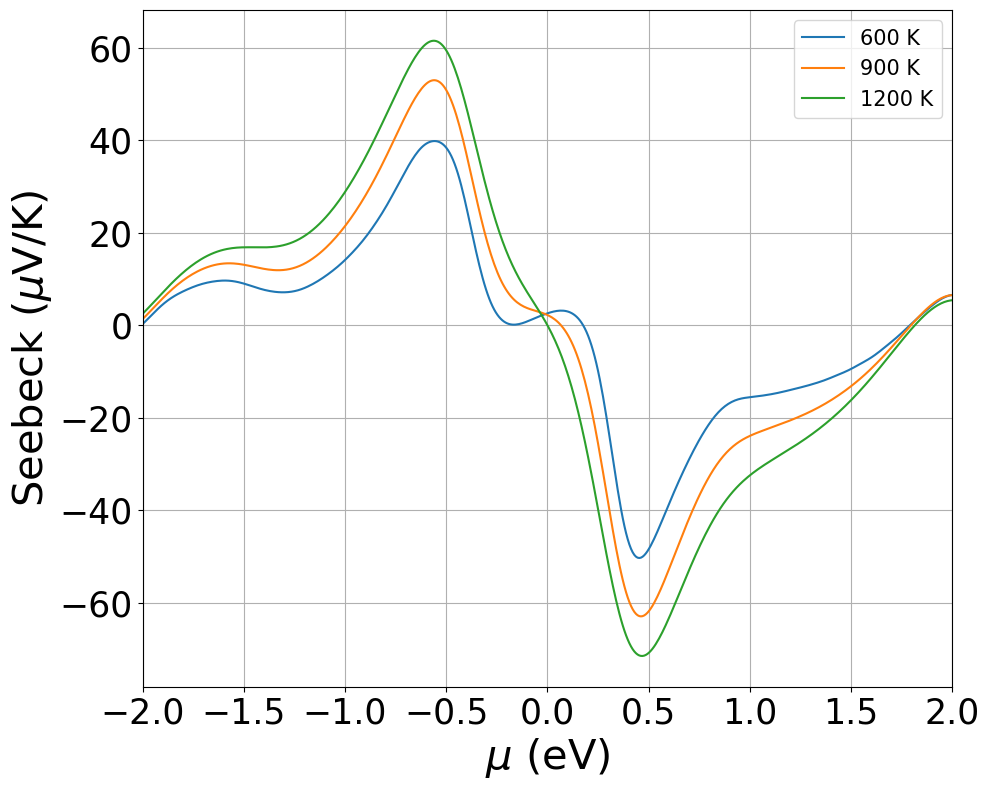

In [56]:
bztPlotter.plot_props('S','mu','temp',temps=[600,900,1200])

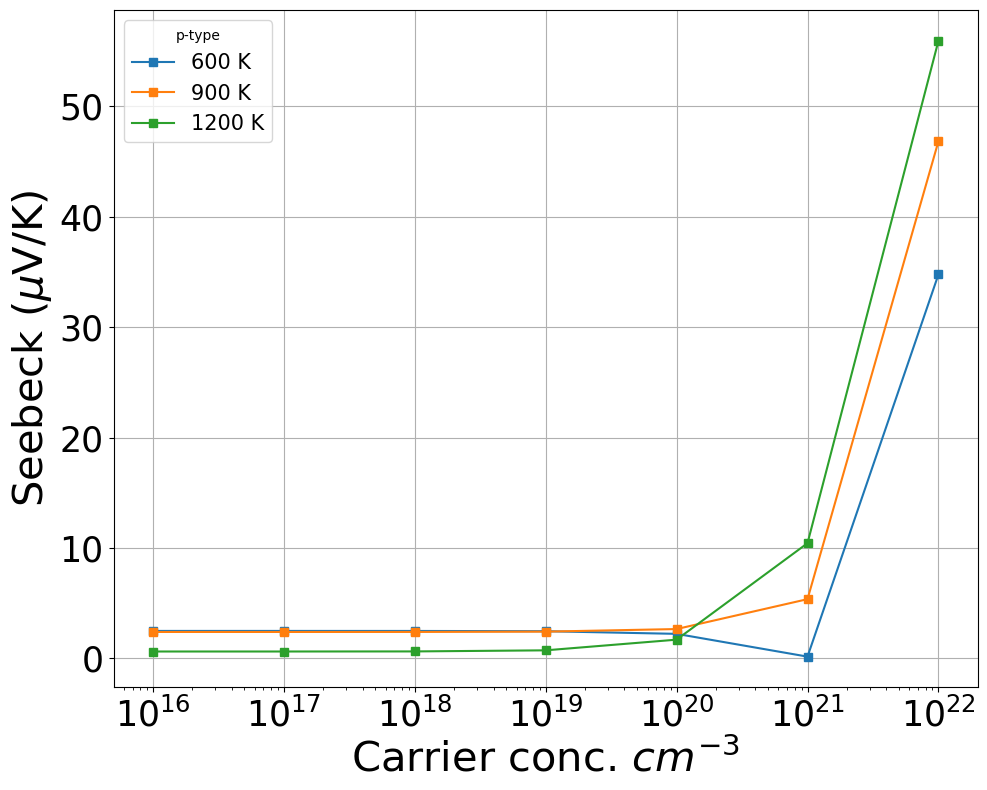

In [57]:
bztPlotter.plot_props('S','doping','temp', temps=[600,900,1200], dop_type='p').show()

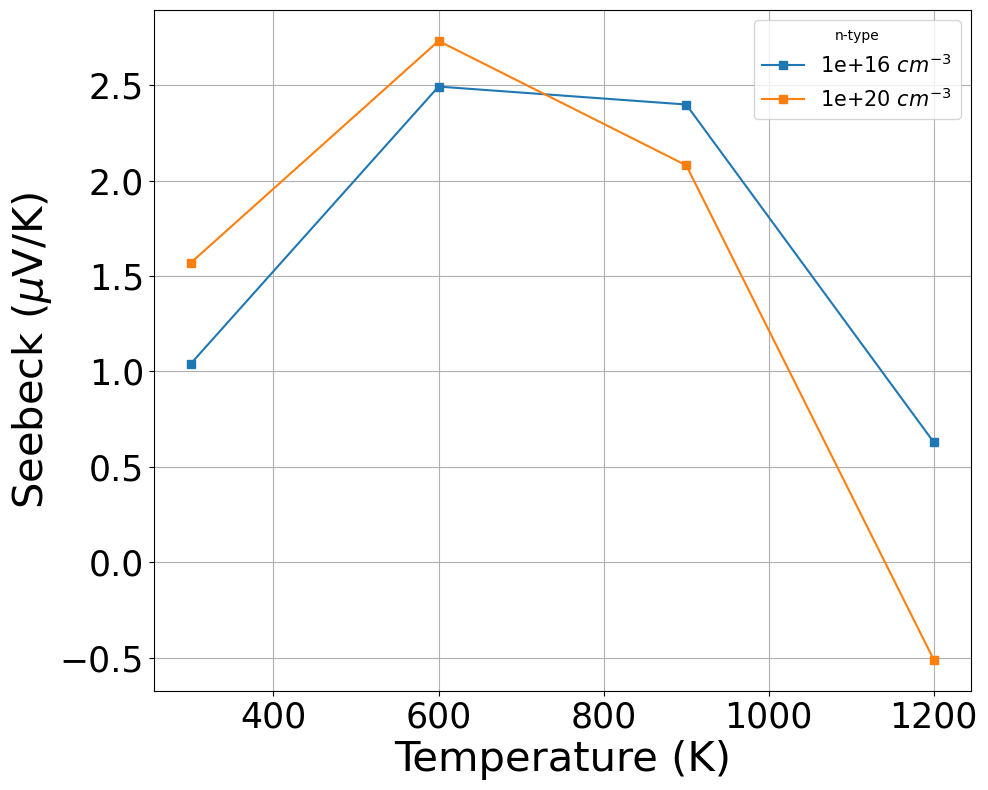

In [58]:
bztPlotter.plot_props('S','temp','doping',doping=[1e16,1e20], dop_type='n').show()

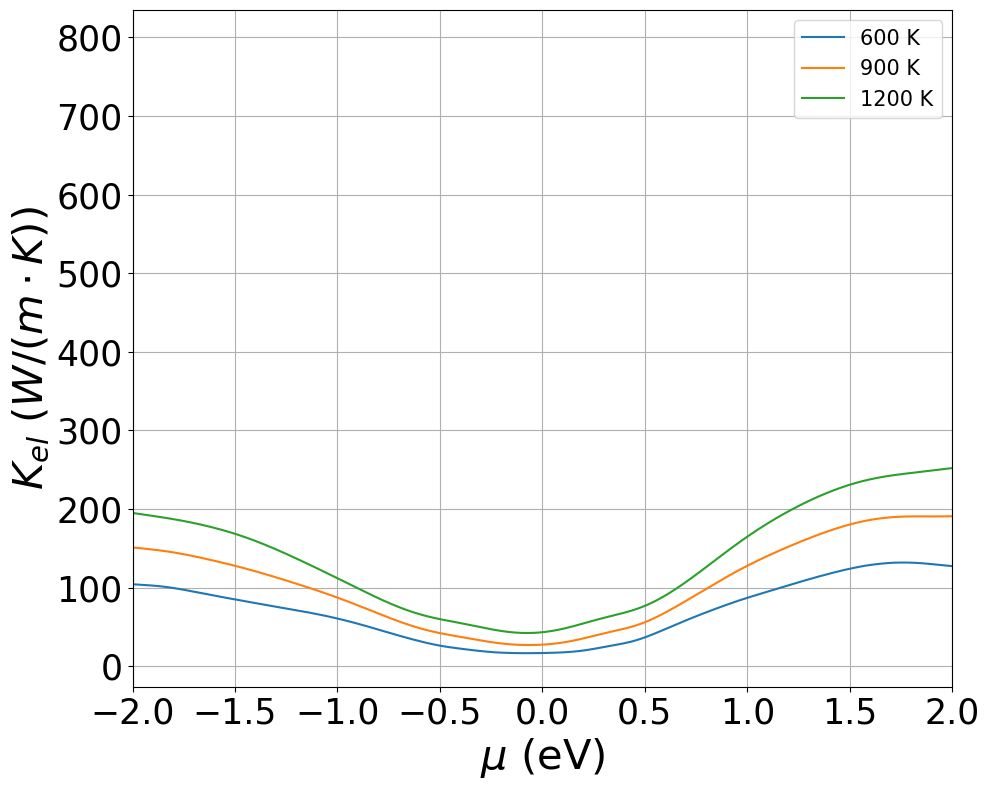

In [59]:
bztPlotter.plot_props('K','mu','temp',temps=[600,900,1200]).show()

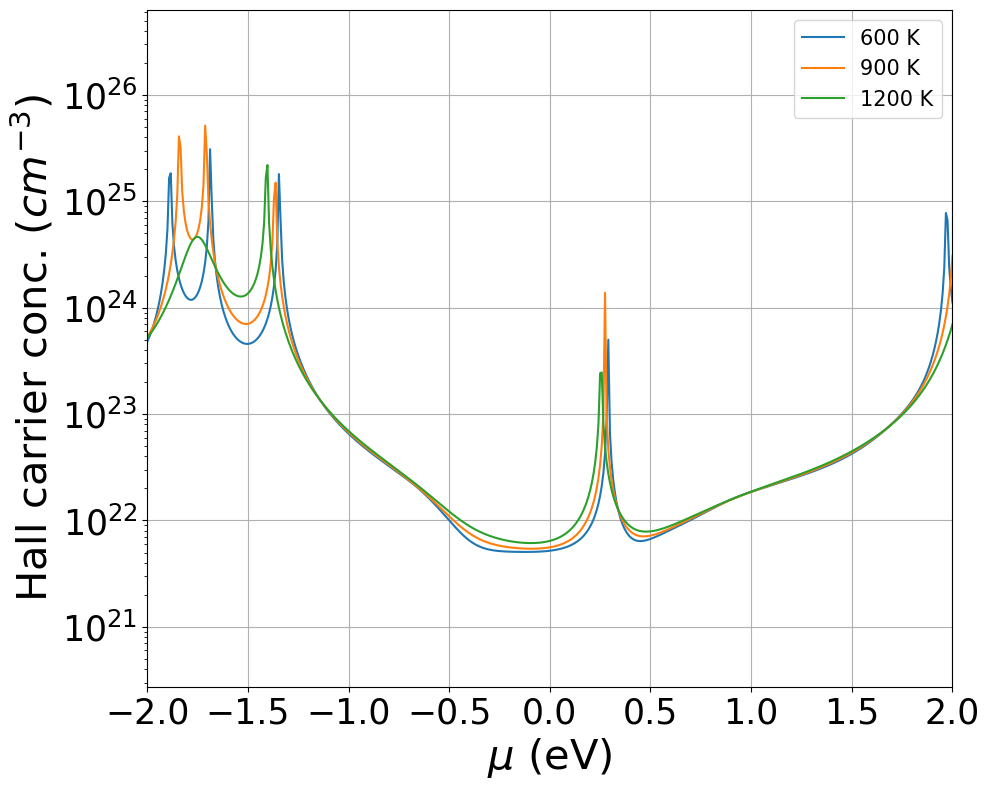

In [60]:
bztPlotter.plot_props('H','mu','temp',temps=[600,900,1200]).show()

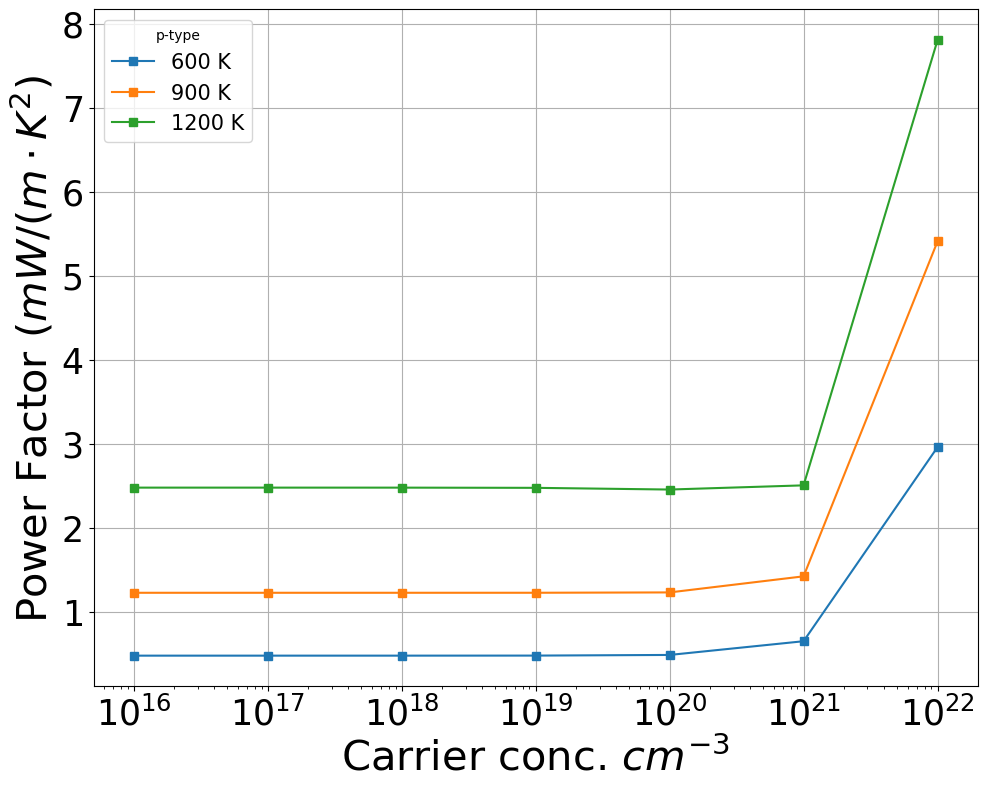

In [61]:
bztPlotter.plot_props('Po','doping','temp',temps=[600,900,1200],dop_type='p').show()

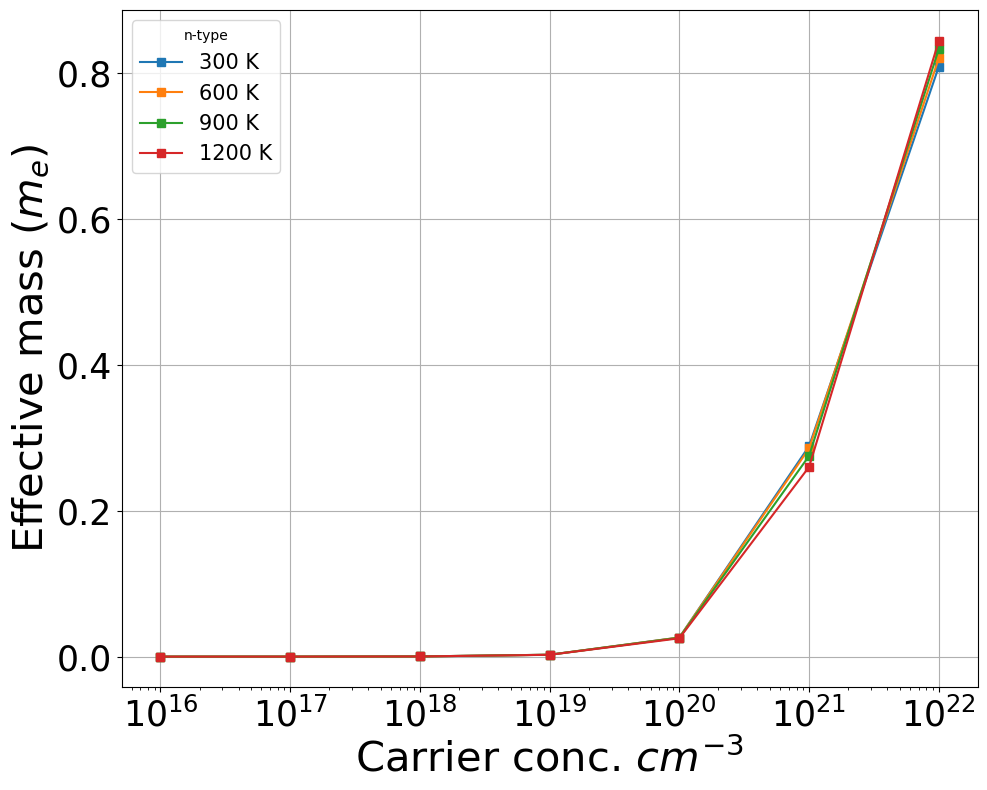

In [62]:
bztPlotter.plot_props('E','doping','temp').show()

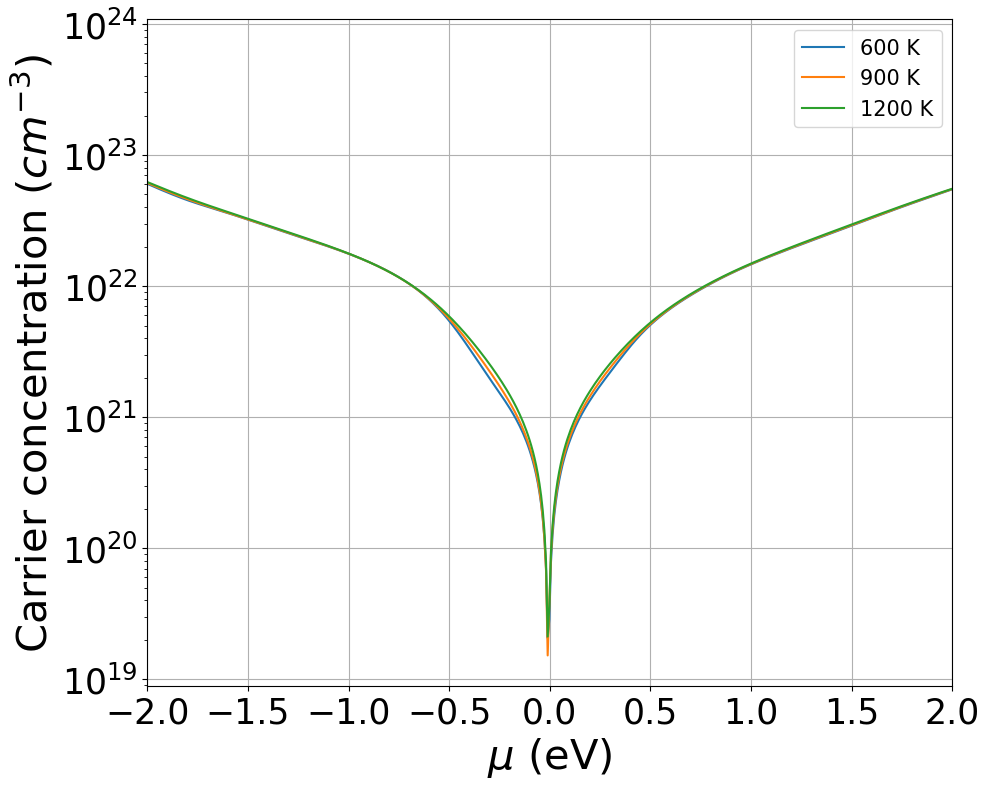

In [63]:
bztPlotter.plot_props('Ca','mu','temp',temps=[600,900,1200]).show()

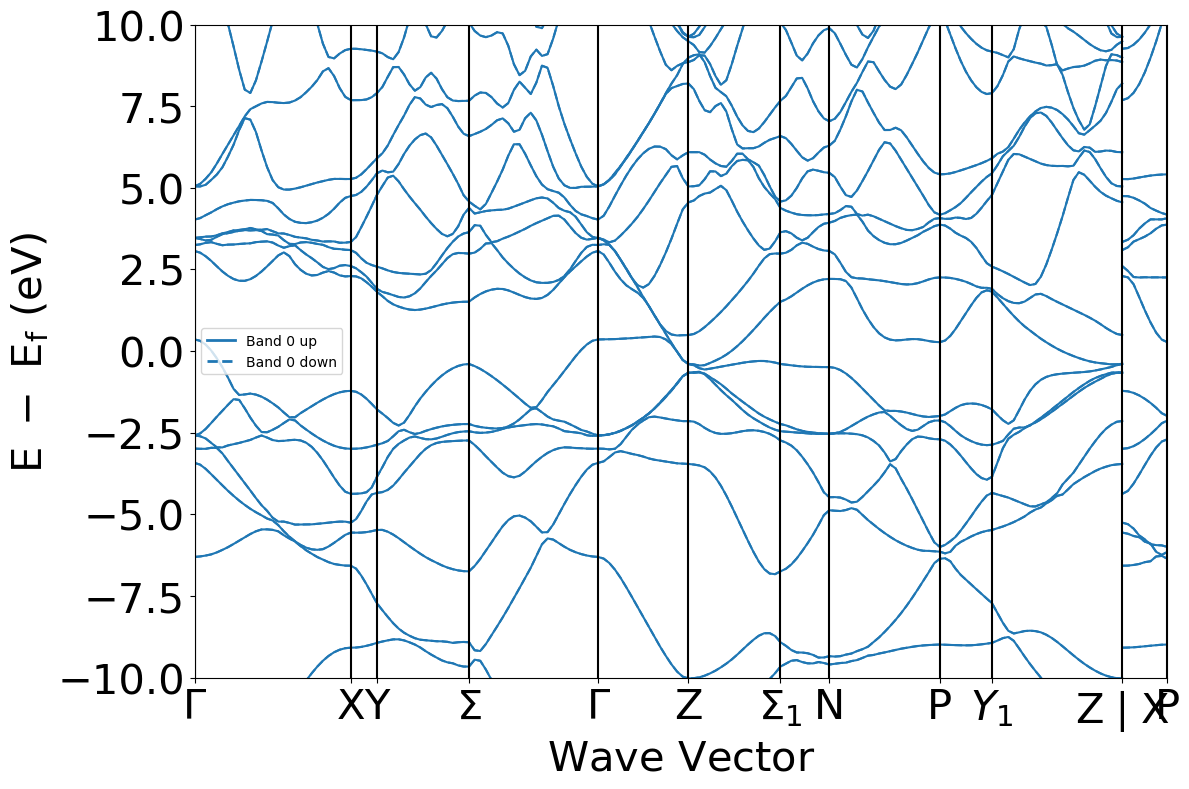

In [64]:
bztPlotter.plot_bands().show()

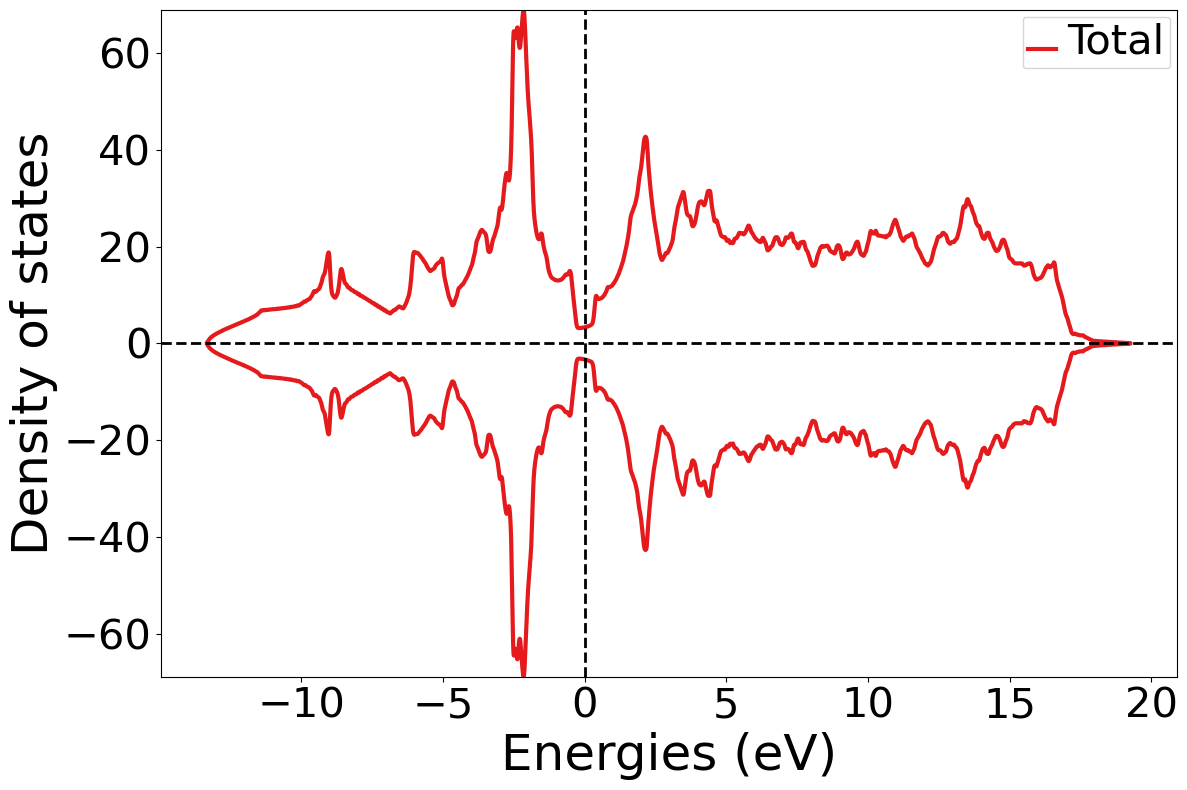

In [65]:
bztPlotter.plot_dos(T=200).show()